In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("laptop_data.csv")

data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
#REMOVING UNNAMED COLUMN

data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
#CHECK DATA NULL
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
#CHECK DUPLICATE ROW
data.duplicated().sum()

29

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
#SIMPLE PRE-PROCESSING

data['Ram'] = data['Ram'].str.replace('GB', '')
data['Weight'] = data['Weight'].str.replace('kg', '')

#CONVERT STRING -> INTEGER
data['Ram'] = data['Ram'].astype('int32')

#CONVERT STRING -> FLOAT
data['Weight'] = data['Weight'].astype('float32')

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

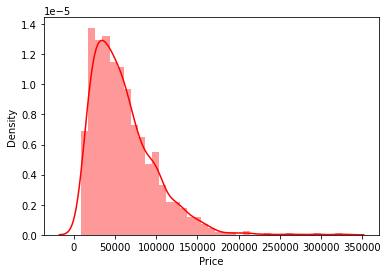

In [10]:
#EXPLORATORY DATA ANALYSIS
#DISTRIBUTION OF TARGET COLUMN

sns.distplot(data['Price'], color='red')

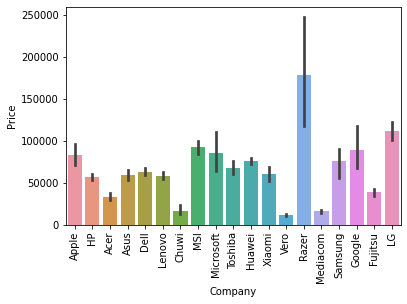

In [11]:
#COMPANY COLUMN

sns.barplot(x=data['Company'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

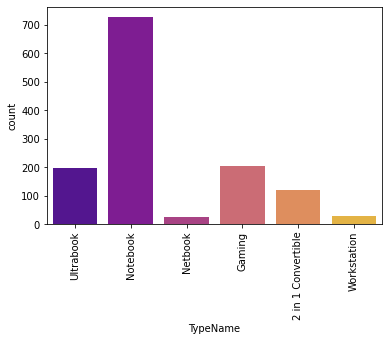

In [12]:
#LAPTOP TYPE

sns.countplot(data['TypeName'], palette='plasma')
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

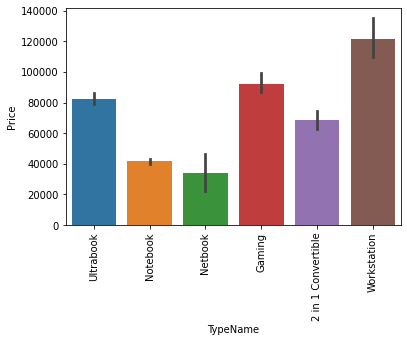

In [13]:
#LAPTOP TYPE X PRICE

sns.barplot(x=data['TypeName'], y=data['Price'])
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='Inches', ylabel='Price'>

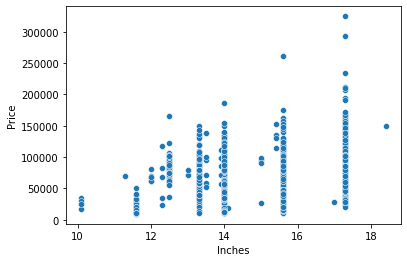

In [14]:
#INCHES X PRICE

sns.scatterplot(x=data['Inches'], y=data['Price'])

/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Touchscreen', ylabel='count'>

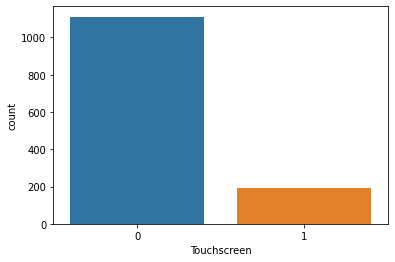

In [15]:
#SCREEN RESOLUTION INFORMATION

data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

#LAPTOP TOUCHSCREEN

sns.countplot(data['Touchscreen'])

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

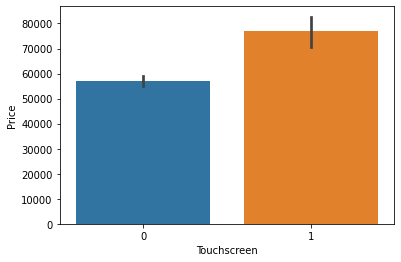

In [16]:
#TOUCHSCREEN X PRICE

sns.barplot(x=data['Touchscreen'], y=data['Price'])

<AxesSubplot:xlabel='IPS', ylabel='Price'>

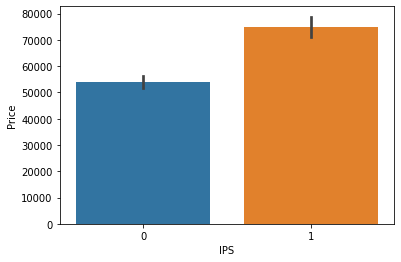

In [17]:
#IPS IN SCREEN RESOLUTION
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=data['IPS'], y=data['Price'])

/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IPS', ylabel='count'>

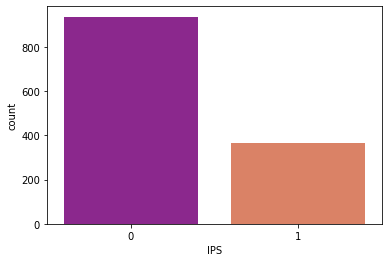

In [18]:
#COUNT IPS

sns.countplot(data['IPS'], palette='plasma')

In [19]:
#EXTRACT X AND Y RESOLUTION
def Xresolution(X_d):
    return X_d.split()[-1].split("x")[0]

def Yresolution(Y_d):
    return Y_d.split()[-1].split("x")[1]

#FIND X AND Y
data['X_res'] = data['ScreenResolution'].apply(lambda x: Xresolution(x))
data['Y_res'] = data['ScreenResolution'].apply(lambda y: Yresolution(y))

#CONVERT TO NUMERIC
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [20]:
#FIND CORRELATION
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [21]:
#CALCULATE PPI SINCE X AND Y RESOLUTION HAVE A STRONG CORRELATION
data['PPI'] = (((data['X_res']**2) + (data['Y_res']**2)) ** 0.5/data['Inches']).astype('float')
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [22]:
data.corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
PPI            0.473487
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

In [23]:
#KEEPING IMPORTANT COLUMN
data.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'], inplace=True)
data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
1132,Asus,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,14811.8400,0,0,111.935204
1000,Acer,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,67132.8000,0,1,141.211998
793,Lenovo,2 in 1 Convertible,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R7 M460,Windows 10,2.08,51095.5200,1,0,141.211998
724,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,71847.0144,0,0,127.335675
27,Dell,Notebook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,42624.0000,0,0,141.211998


In [24]:
#CPU COLUMN EXTRACTION
def processor_type(text):
    cpu = " ".join(text.split()[0:3])
    if cpu == 'Intel Core i7' or cpu == 'Intel Core i5' or cpu == 'Intel Core i3':
        return cpu
    elif cpu.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

data['CPU_Name'] = data['Cpu'].apply(lambda x: processor_type(x))
data.sample(7)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name
462,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.37,39906.7200,0,0,141.211998,Intel Core i5
173,Toshiba,Notebook,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.00,26053.9200,0,0,100.454670,Intel Core i3
42,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce 940MX,Linux,2.30,27864.9072,0,0,100.454670,Intel Core i5
146,HP,Ultrabook,Intel Core M 6Y75 1.2GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.97,107305.9200,1,1,352.465147,Other Intel Processor
1225,Asus,Notebook,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,2.65,16463.5200,0,0,100.454670,Other Intel Processor
179,HP,2 in 1 Convertible,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.29,79866.7200,1,1,331.264236,Intel Core i5
277,Acer,Notebook,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,39693.6000,0,1,141.211998,Intel Core i7


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

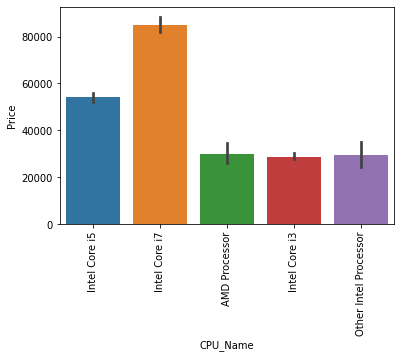

In [25]:
#CPU X LAPTOP PRICE
sns.barplot(x=data['CPU_Name'], y=data['Price'])
plt.xticks(rotation='vertical')

/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram', ylabel='Price'>

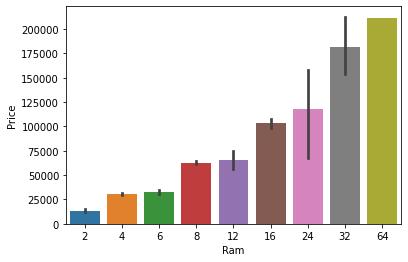

In [26]:
#RAM X LAPTOP PRICE
sns.barplot(data['Ram'], data['Price'])

In [27]:
#MEMORY COLUMN
#WE HAVE TO SEPARATE DIFFERENT CATEGORIES AND VARIATIONS

data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [28]:
#4 MOST COMMON OBSERVED: SSD, HDD, FLASH, HYBRID

#REMOVE DECIMAL SUCH AS 1.0 -> 1
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)

#REPLACE GB WORD WITH ''
data['Memory'] = data['Memory'].str.replace('GB', '')

#REPLACE TB WORD WITH '000'
data['Memory'] = data['Memory'].str.replace('TB', '000')

#SPLIT THE WORD ACCROSS '+' CHARACTER
new_data = data['Memory'].str.split("+", n=1, expand=True)

new_data

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [29]:
#INPUT COLUMN 0 FROM NEW_DATA TO DATA
data['first'] = new_data[0]
data['first'] = data['first'].str.strip()
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [30]:
#FLAG FOR DISK TYPE
def applychanges(value):
    data['Layer1'+value] = data['first'].apply(lambda x:1 if value in x else 0)

listtoapply = ['HDD', 'SSD', 'Flash Storage', 'Hybrid']
for value in listtoapply:
    applychanges(value)

data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,1,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [31]:
data.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid
838,Lenovo,Notebook,Intel Celeron Quad Core N3160 1.6GHz,4,16 Flash Storage,Intel HD Graphics 400,Chrome OS,1.50,17316.0000,0,0,111.935204,Other Intel Processor,16 Flash Storage,0,0,1,0
725,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,4,1000 HDD,Intel HD Graphics 620,No OS,1.90,26101.8720,0,0,100.454670,Intel Core i5,1000 HDD,1,0,0,0
1007,HP,Ultrabook,Intel Core i7 6600U 2.6GHz,8,256 SSD,Intel HD Graphics 520,Windows 7,1.43,77202.7200,0,0,157.350512,Intel Core i7,256 SSD,0,1,0,0
1005,HP,Notebook,Intel Core i5 6300U 2.4GHz,4,256 SSD,Intel HD Graphics 520,Windows 10,1.48,58607.4672,0,0,111.935204,Intel Core i5,256 SSD,0,1,0,0
426,Dell,Notebook,Intel Core i7 8550U 1.8GHz,8,256 SSD + 2000 HDD,AMD Radeon 530,Windows 10,2.02,60867.0720,0,0,141.211998,Intel Core i7,256 SSD,0,1,0,0
735,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,4,1000 HDD,Intel HD Graphics 620,Windows 10,1.85,41505.1200,0,0,141.211998,Intel Core i7,1000 HDD,1,0,0,0
427,Dell,Ultrabook,Intel Core i7 7600U 2.8GHz,8,256 SSD,Intel HD Graphics 620,Linux,1.60,58554.7200,0,0,157.350512,Intel Core i7,256 SSD,0,1,0,0
483,Chuwi,Notebook,Intel Atom x5-Z8350 1.44GHz,4,64 Flash Storage,Intel HD Graphics,Windows 10,1.89,13261.3920,0,0,141.211998,Other Intel Processor,64 Flash Storage,0,0,1,0
1093,Dell,Ultrabook,Intel Core i5 8250U 1.6GHz,4,256 SSD,AMD Radeon 530,Windows 10,1.40,43601.6880,0,1,165.632118,Intel Core i5,256 SSD,0,1,0,0
539,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,8,256 SSD,Nvidia GeForce 940MX,Windows 10,1.87,45767.5200,0,1,157.350512,Intel Core i7,256 SSD,0,1,0,0


In [32]:
#REMOVE CHARACTER AND KEEP NUMBERS
data['first'] = data['first'].str.replace(r'\D', '')
data['first'].value_counts()

/tmp/ipykernel_14486/789207437.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D', '')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [33]:
#TREAT FOR SECOND COLUMN (1)
data['second'] = new_data[1]
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid,second
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,1,0,None
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [34]:
#FLAG FOR DISK TYPE
def applychanges1(value):
    data['Layer2'+value] = data['second'].apply(lambda x:1 if value in x else 0)

listtoapply = ['HDD', 'SSD', 'Flash Storage', 'Hybrid']
data['second'] = data['second'].fillna("0")
for value in listtoapply:
    applychanges1(value)

#REMOVE CHARACTER AND KEEP NUMBERS
data['second'] = data['second'].str.replace(r'\D', '')
data['second'].value_counts()

data.head()

/tmp/ipykernel_14486/1430701178.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D', '')


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid,second,Layer2HDD,Layer2SSD,Layer2Flash Storage,Layer2Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128,0,0,1,0,0,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,256,0,1,0,0,0,0,0,0,0


In [35]:
data['second'].value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: second, dtype: int64

In [36]:
data['first'] = data['first'].astype('int')
data['second'] = data['second'].astype('int')
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid,second,Layer2HDD,Layer2SSD,Layer2Flash Storage,Layer2Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128,0,0,1,0,0,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,256,0,1,0,0,0,0,0,0,0


In [37]:
#MULTIPLYING THE ELEMENTS AND STORING THE RESULT IN SUBSEQUENT COLUMNS

data['HDD'] = (data['first']*data['Layer1HDD']+data['second']*data['Layer2HDD'])
data['SSD'] = (data['first']*data['Layer1SSD']+data['second']*data['Layer2SSD'])
data['Hybrid'] = (data['first']*data['Layer1Hybrid']+data['second']*data['Layer2Hybrid'])
data['Flash_Storage'] = (data['first']*data['Layer1Flash Storage']+data['second']*data['Layer2Flash Storage'])

#DROP UNCESSARY COLUMN
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash Storage'], inplace=True)

data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Hybrid,Flash_Storage
724,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,71847.0144,0,0,127.335675,Intel Core i7,1000,128,0,0
654,HP,Notebook,Intel Core i3 6006U 2GHz,4,500 HDD,Intel HD Graphics 520,No OS,1.86,19441.8720,0,0,100.454670,Intel Core i3,500,0,0,0
976,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,4,508 Hybrid,Intel HD Graphics 520,Windows 7,1.70,53386.5600,0,0,111.935204,Intel Core i5,0,0,508,0
1266,HP,Notebook,AMD A9-Series 9410 2.9GHz,6,1000 Hybrid,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,0,0,141.211998,AMD Processor,0,0,1000,0
876,Asus,Notebook,Intel Pentium Quad Core N4200 1.1GHz,4,1000 HDD,Intel HD Graphics 505,Linux,2.00,21258.1872,0,0,100.454670,Other Intel Processor,1000,0,0,0


In [38]:
#DROP MEMORY COLUMN
data.drop(columns=['Memory'], inplace=True)
data.sample(5)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Hybrid,Flash_Storage
86,HP,Ultrabook,Intel Core i7 8550U 1.8GHz,8,Nvidia GeForce GTX 940MX,Windows 10,1.83,37242.72,0,1,141.211998,Intel Core i7,0,256,0,0
228,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,Nvidia GeForce GTX 950M,Windows 10,2.69,47472.48,0,0,127.335675,Intel Core i5,500,256,0,0
1234,Apple,Ultrabook,Intel Core i5 1.6GHz,4,Intel HD Graphics 6000,Mac OS X,1.08,51095.52,0,0,135.094211,Intel Core i5,0,0,0,256
797,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Windows 10,1.95,43156.80,0,0,100.454670,Intel Core i5,0,128,0,0
617,HP,Ultrabook,Intel Core i7 7500U 2.7GHz,8,Intel HD Graphics 620,Windows 10,1.84,74005.92,0,0,141.211998,Intel Core i7,0,512,0,0


In [39]:
data.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [40]:
data.drop(columns=['Hybrid'], inplace=True)
data.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0


In [41]:
#GPU ANALYSIS
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [42]:
print(data[data['Gpu'].str.contains('ARM')])

      Company            TypeName                            Cpu  Ram  \
1191  Samsung  2 in 1 Convertible  Samsung Cortex A72&A53 2.0GHz    4   

                    Gpu      OpSys  Weight     Price  Touchscreen  IPS  \
1191  ARM Mali T860 MP4  Chrome OS    1.15  35111.52            1    1   

           PPI       CPU_Name  HDD  SSD  Flash_Storage  
1191  234.5074  AMD Processor    0    0             32  


/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu_brand', ylabel='count'>

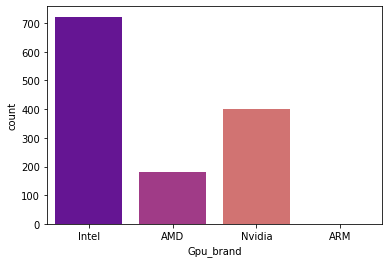

In [43]:
data['Gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(data['Gpu_brand'], palette='plasma')

/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu_brand', ylabel='count'>

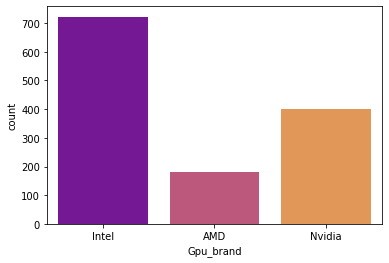

In [44]:
#REMOVE ARM TUPLE
data = data[data['Gpu_brand'] != 'ARM']
sns.countplot(data['Gpu_brand'], palette='plasma')

/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu_brand', ylabel='Price'>

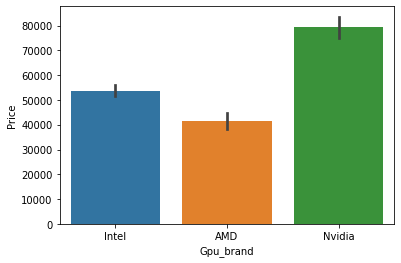

In [45]:
sns.barplot(data['Gpu_brand'], data['Price'])

In [46]:
data.drop(columns=['Gpu'], inplace=True)
data.head()

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,Intel


In [47]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


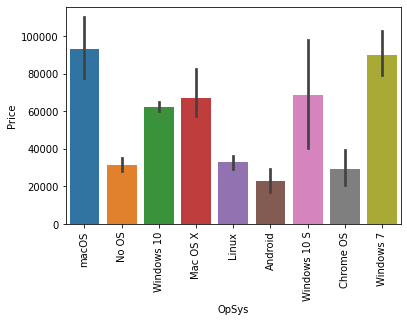

In [48]:
# OPSYS COLUMN ANALYSIS
sns.barplot(data['OpSys'], data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
#SIMPLE OPSYS CATEGORY
def setcategory(text):
    if text == 'Windows 10' or text =='Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text =='Mac OS X' or text =='macOS':
        return 'Mac'
    else:
        return 'Other'

data['OpSys'] = data['OpSys'].apply(lambda x:setcategory(x))
data.head()

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,Intel


In [50]:
data.sample(10)

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_Storage,Gpu_brand
674,HP,2 in 1 Convertible,Intel Core i3 7100U 2.4GHz,4,Windows,1.63,37242.7200,1,1,157.350512,Intel Core i3,0,128,0,Nvidia
976,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,4,Windows,1.70,53386.5600,0,0,111.935204,Intel Core i5,0,0,0,Intel
343,Lenovo,2 in 1 Convertible,Intel Core i7 8550U 1.8GHz,16,Windows,1.40,111834.7200,1,1,316.965060,Intel Core i7,0,512,0,Intel
397,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,Windows,1.90,49976.6400,0,1,157.350512,Intel Core i5,0,256,0,Intel
1146,HP,Ultrabook,Intel Core i7 6500U 2.50GHz,8,Windows,1.26,122381.4960,0,0,176.232574,Intel Core i7,0,256,0,Intel
443,Lenovo,Notebook,Intel Pentium Quad Core N4200 1.1GHz,4,Windows,2.20,18594.7200,0,0,141.211998,Other Intel Processor,0,128,0,Intel
273,Lenovo,2 in 1 Convertible,Intel Core i7 6600U 2.6GHz,16,Windows,1.36,133146.7200,1,0,209.800683,Intel Core i7,0,512,0,Intel
1089,Acer,Notebook,AMD A8-Series 7410 2.2GHz,4,Windows,2.40,20619.3600,0,0,100.454670,AMD Processor,500,0,0,AMD
1176,Lenovo,Notebook,Intel Core i7 6500U 2.5GHz,4,Windows,2.32,43956.0000,0,0,141.211998,Intel Core i7,0,0,0,Intel
611,Dell,Gaming,Intel Core i7 6700HQ 2.6GHz,16,Windows,2.59,46833.6528,0,0,141.211998,Intel Core i7,1000,0,0,Nvidia


/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OpSys', ylabel='count'>

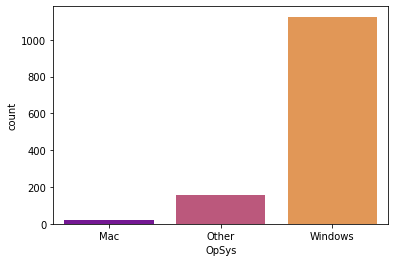

In [51]:
sns.countplot(data['OpSys'], palette='plasma')

/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


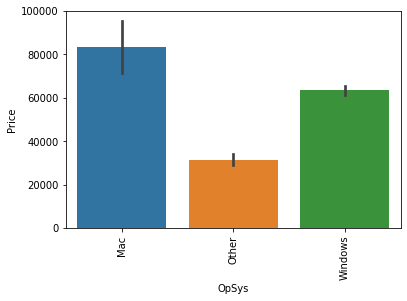

In [52]:
sns.barplot(data['OpSys'], data['Price'])
plt.xticks(rotation='vertical')
plt.show()

/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

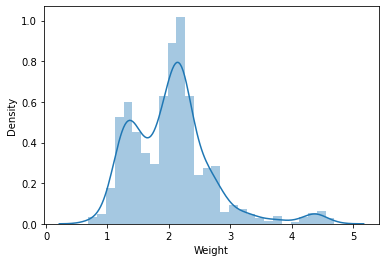

In [53]:
#WEIGHT ANALYSIS
sns.distplot(data['Weight'])

/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Price'>

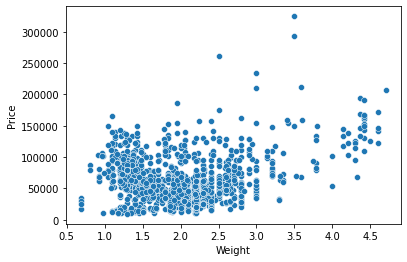

In [54]:
sns.scatterplot(data['Weight'], data['Price'])

/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

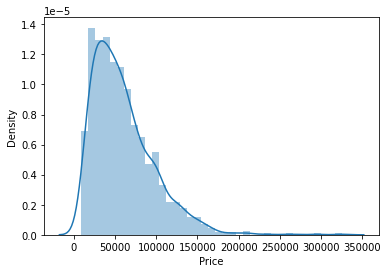

In [55]:
#PRICE ANALYSIS
sns.distplot(data['Price'])

/home/wiwaaw/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

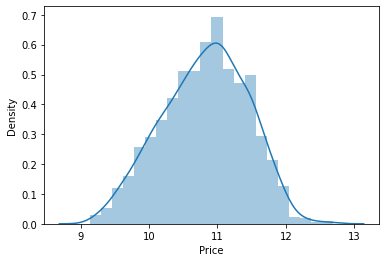

In [56]:
#APPLY NP.LOG
sns.distplot(np.log(data['Price']))

In [57]:
data.corr()['Price']

Ram              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
IPS              0.253320
PPI              0.475368
HDD             -0.096891
SSD              0.670660
Flash_Storage   -0.040067
Name: Price, dtype: float64

<AxesSubplot:>

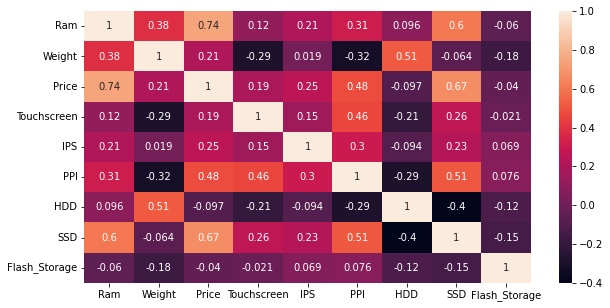

In [58]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

In [59]:
data.head()

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,Intel


In [60]:
#DROP SOME COLUMN
data.drop(columns=['Cpu', 'Flash_Storage'], inplace=True)
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [61]:
#MODEL BUILDING
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [62]:
#SPLIT TRAIN AND TEST SET
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)
X.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [63]:
X_train.shape, X_test.shape

((1106, 12), (196, 12))

In [64]:
mapper = {i:value for i, value in enumerate (X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'Touchscreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_Name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu_brand'}

In [65]:
#PIPELINE
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score: ',metrics.r2_score(y_test,y_pred))
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))

R2 Score:  0.8851499847098487
MAE:  0.15870252595141304


In [66]:
#EXPORT FILES
import pickle
data.to_csv("traineddata.csv", index=False)
pickle.dump(pipe,open('pipe.pkl', 'wb'))